# Explore here

In [1]:
import pandas as pd

bank_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep = ';')

In [2]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank_df['contact'].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [4]:
bank_df.groupby('contact') ['age'].describe()

,count,mean,std,min,25%,50%,75%,max
contact,,,,,,,,
cellular,26144.0,39.968559,10.953041,17.0,32.0,38.0,47.0,98.0
telephone,15044.0,40.120513,9.425555,18.0,33.0,39.0,47.0,86.0


In [5]:
bank_df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

Text(0.5, 0, 'Seconds')

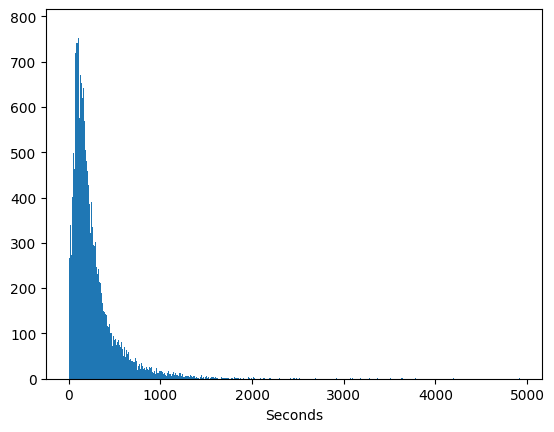

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(bank_df['duration'],bins=1000);
plt.xlabel("Seconds")

In [7]:
bank_df['y'] = bank_df['y'].astype('category')

In [8]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
bank_df.drop(columns=['contact', 'campaign', 'previous', 'day_of_week', 'euribor3m', 'cons.conf.idx', 'cons.price.idx'], inplace=True)

In [10]:
bank_df.head()

,age,job,marital,education,default,housing,loan,month,duration,pdays,poutcome,emp.var.rate,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,261,999,nonexistent,1.1,5191.0,no
1,57,services,married,high.school,unknown,no,no,may,149,999,nonexistent,1.1,5191.0,no
2,37,services,married,high.school,no,yes,no,may,226,999,nonexistent,1.1,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,151,999,nonexistent,1.1,5191.0,no
4,56,services,married,high.school,no,no,yes,may,307,999,nonexistent,1.1,5191.0,no


In [11]:
bank_df.drop(columns=['education', 'default', 'poutcome', 'pdays', 'job', 'emp.var.rate', 'nr.employed', 'month',], inplace=True)

<Axes: xlabel='y', ylabel='Count'>

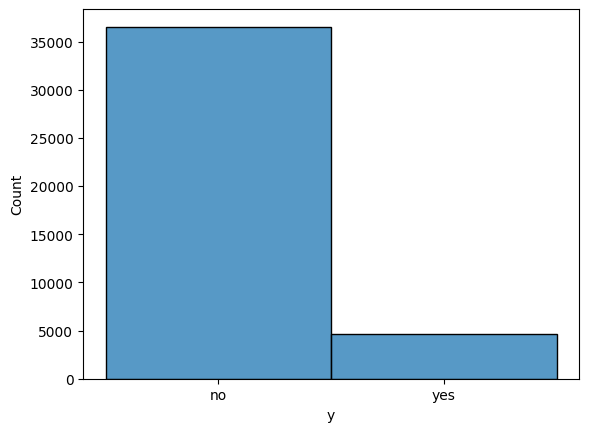

In [12]:
sns.histplot(x=bank_df['y'])

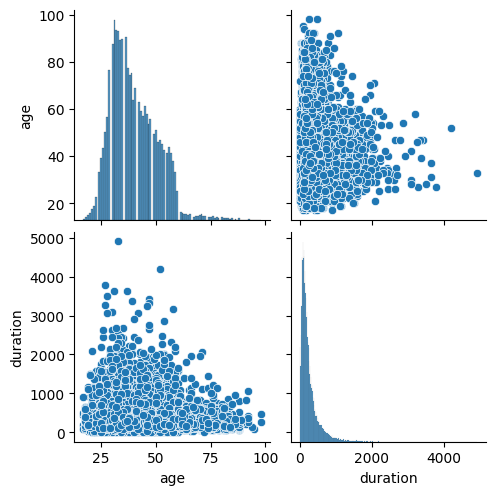

In [13]:
sns.pairplot(bank_df)

In [32]:
X = bank_df.drop(columns=['y'])

y = bank_df['y']

In [26]:
#y = pd.get_dummies(y, dtype = int, drop_first=True)

In [33]:
X

,age,marital,housing,loan,duration
0,56,married,no,no,261
1,57,married,no,no,149
2,37,married,yes,no,226
3,40,married,no,no,151
4,56,married,no,yes,307
...,...,...,...,...,...
41183,73,married,yes,no,334
41184,46,married,no,no,383
41185,56,married,yes,no,189
41186,44,married,no,no,442


In [34]:
X_dummies = pd.get_dummies(X, dtype='int', drop_first = True)
X_dummies

,age,duration,marital_married,marital_single,marital_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes
0,56,261,1,0,0,0,0,0,0
1,57,149,1,0,0,0,0,0,0
2,37,226,1,0,0,0,1,0,0
3,40,151,1,0,0,0,0,0,0
4,56,307,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,0,0,1,0,0
41184,46,383,1,0,0,0,0,0,0
41185,56,189,1,0,0,0,1,0,0
41186,44,442,1,0,0,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.3, random_state=4)

In [37]:
from sklearn.linear_model import LogisticRegression

In [39]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_train_preds = logreg.predict(X_train)

In [41]:
y_test_preds = logreg.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
accuracy_score(y_true=y_train, y_pred=y_train_preds)

0.8942804620027054

In [44]:
accuracy_score(y_true=y_test, y_pred=y_test_preds)

0.8911548110382779

In [45]:
confusion_matrix(y_true=y_train, y_pred=y_train_preds)

array([[25228,   365],
       [ 2683,   555]])

In [46]:
confusion_matrix(y_true=y_test, y_pred=y_test_preds)

array([[10791,   164],
       [ 1181,   221]])

In [49]:
print(classification_report(y_true=y_train, y_pred=y_train_preds))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94     25593
         yes       0.60      0.17      0.27      3238

    accuracy                           0.89     28831
   macro avg       0.75      0.58      0.60     28831
weighted avg       0.87      0.89      0.87     28831



In [50]:
print(classification_report(y_true=y_test, y_pred=y_test_preds))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94     10955
         yes       0.57      0.16      0.25      1402

    accuracy                           0.89     12357
   macro avg       0.74      0.57      0.59     12357
weighted avg       0.86      0.89      0.86     12357



In [53]:
bank_df['y'].value_counts(normalize=True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64